In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import time

In [3]:
# 1.获取数据
train = pd.read_csv('./data/train.csv')

train_image = train.ix[:,1:]
train_label = train.ix[:,0]

/Users/sherwin/workspaces/ai/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.


In [4]:
train_image.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train_label.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [6]:
# 把一条数据转换为一张图片
train_image.ix[0,].values.reshape(28,28)

/Users/sherwin/workspaces/ai/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

In [7]:
# 图片可视化
def to_plot(n):
    """
    n :第几个样本
    """
    some_digit_image = train_image.ix[n,].values.reshape(28,28)
    plt.imshow(some_digit_image, cmap=plt.cm.binary, interpolation='nearest')
    plt.axis('off')
    plt.show()


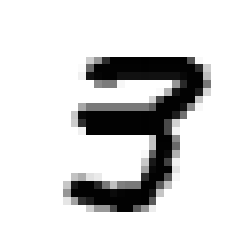

In [13]:
to_plot(2000)

In [52]:
# 2.数据基本处理
# 2.1 数据归一化处理
train_image = train_image.values / 255.0

In [53]:
train_label = train_label.values

In [54]:
print('the shape of train_image: {}, train_label: {}'.format(train_image.shape, train_label.shape))

the shape of train_image: (42000, 784), train_label: (42000,)


In [55]:
# 2.2 数据分割
X_train, X_val, y_train, y_val = train_test_split(train_image,train_label, train_size = 0.8,random_state = 0)

/Users/sherwin/workspaces/ai/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [56]:
print(X_train.shape)
print(X_val.shape)

(33600, 784)
(8400, 784)


In [57]:
# 3.特征降维和模型训练
def n_component_analysis(n, X_train, y_train, X_val, y_val):
    start = time.time()
    pca = PCA(n_components=n)
    print("PCA begin with n_components: {}".format(n));
    pca.fit(X_train)
    # 在训练集和测试集降维 
    X_train_pca = pca.transform(X_train)
    X_val_pca = pca.transform(X_val)
    # 利用SVC训练
    print('SVC begin')
    clf1 = svm.SVC()
    clf1.fit(X_train_pca, y_train)
    # 返回accuracy
    accuracy = clf1.score(X_val_pca, y_val)
    end = time.time()
    print("accuracy: {}, time elaps:{}".format(accuracy, int(end-start)))
    return accuracy

In [58]:
n_s = np.linspace(0.70, 0.85, num=5)
accuracy = []
for n in n_s:
    tmp = n_component_analysis(n, X_train, y_train, X_val, y_val)
    accuracy.append(tmp)

PCA begin with n_components: 0.7
SVC begin
accuracy: 0.9786904761904762, time elaps:15
PCA begin with n_components: 0.7374999999999999
SVC begin
accuracy: 0.9794047619047619, time elaps:15
PCA begin with n_components: 0.7749999999999999
SVC begin
accuracy: 0.9791666666666666, time elaps:17
PCA begin with n_components: 0.8125
SVC begin
accuracy: 0.9796428571428571, time elaps:20
PCA begin with n_components: 0.85
SVC begin
accuracy: 0.9780952380952381, time elaps:25


<function matplotlib.pyplot.plot(*args, **kwargs)>

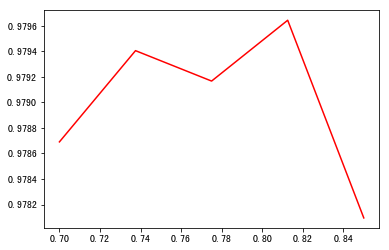

In [59]:
plt.plot(n_s, np.array(accuracy), 'r')
plt.plot

In [65]:
pca = PCA(n_components=0.80)
pca.fit(X_train)
pca.n_components_

43

In [67]:
X_train_pca = pca.transform(X_train)
X_val_pca = pca.transform(X_val)

In [68]:
print(X_train_pca.shape)
print(X_val_pca.shape)

(33600, 43)
(8400, 43)


In [69]:
clf1 = svm.SVC()
clf1.fit(X_train_pca, y_train)
clf1.score(X_val_pca, y_val)

0.979047619047619